# Data Drift Test Notebook for Tabular Data

This notebook implements a series of tests and measures to determine drift between a baseline and production dataset.

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot, 
                    categorical_grouped_bar_plot, 
                    jensen_shannon_distance_numerical, 
                    jensen_shannon_distance_categorical, 
                    normed_wasserstein_distance_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

### Numerical Data

In [46]:
observations = 100_000
observations_reduction_factor_for_y = 10
bin_strategy = 'stu' #choose between 'stu', 'evi', 'min', and 'max'

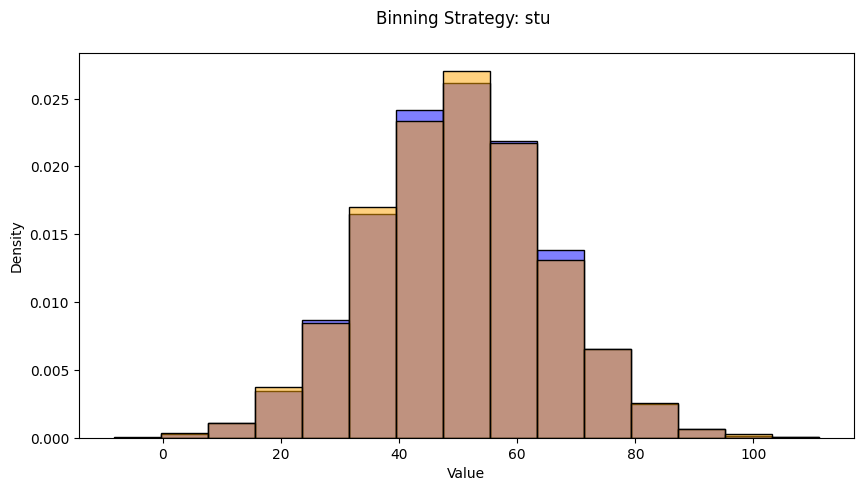

In [47]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(50, 15, int(observations/observations_reduction_factor_for_y)) # identical with x
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

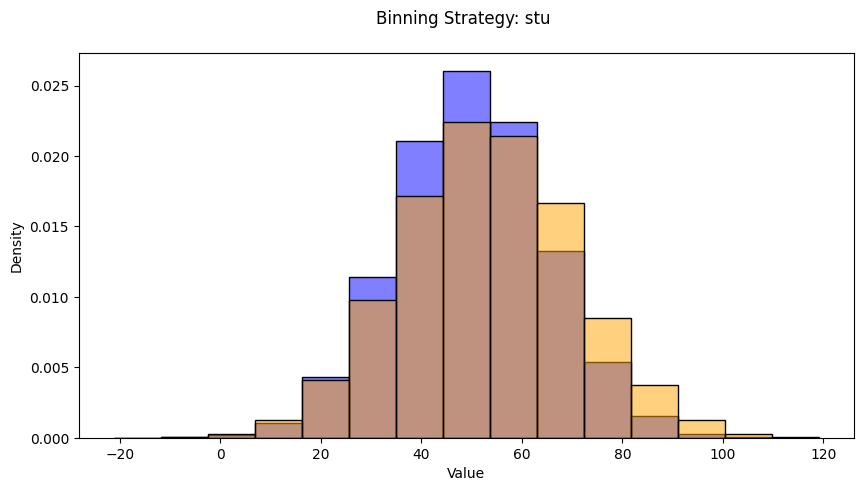

In [48]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(53, 17, int(observations/observations_reduction_factor_for_y)) # Minor drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

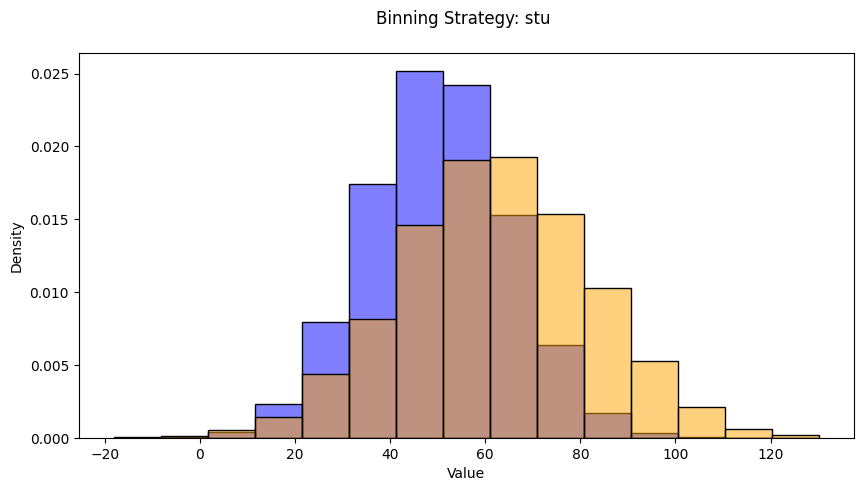

In [49]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(62, 20, int(observations/observations_reduction_factor_for_y)) # major drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

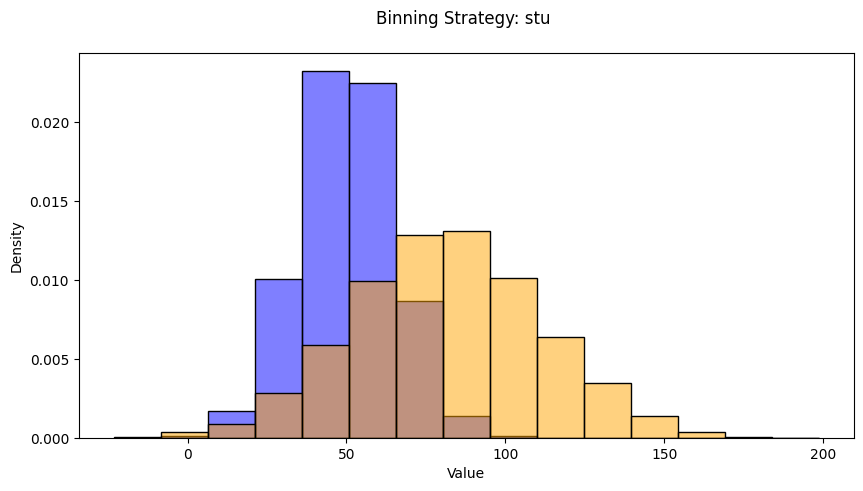

In [50]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(82, 30, int(observations/observations_reduction_factor_for_y)) # major drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

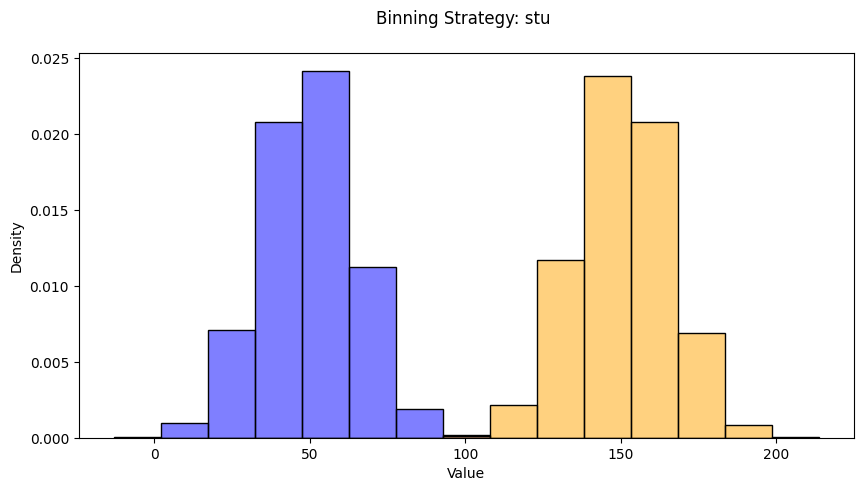

In [51]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(150, 15, int(observations/observations_reduction_factor_for_y)) # extreme drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

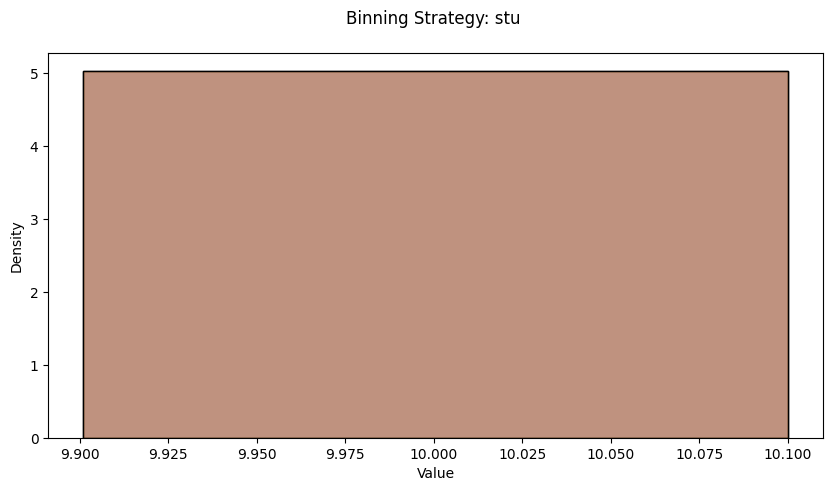

In [52]:
x = np.full(observations,10) # single value
y = np.full(int(observations/observations_reduction_factor_for_y),10) # same single value
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

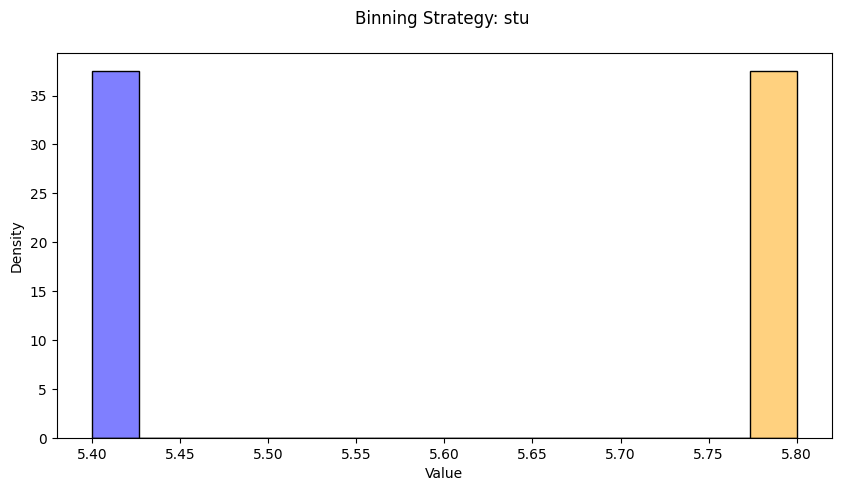

In [53]:
x = np.full(observations,5.4) # single value
y = np.full(int(observations/observations_reduction_factor_for_y),5.8) #different single val
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

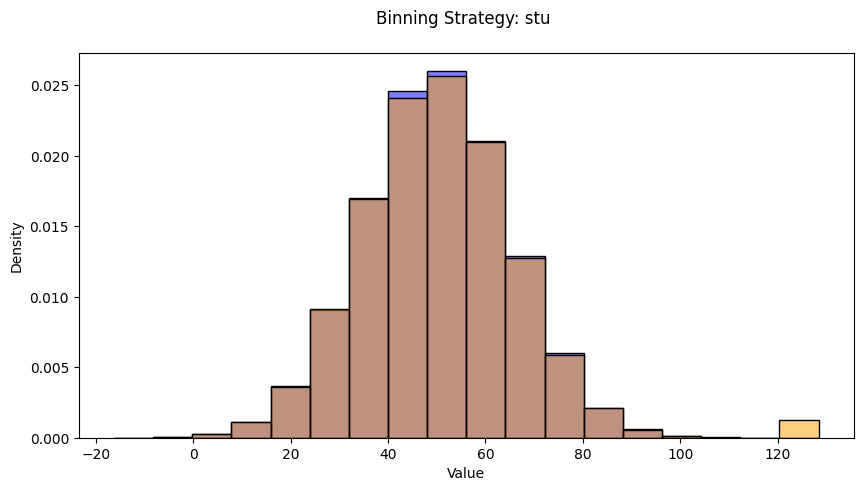

In [54]:
x = np.random.normal(50, 15, observations) # reference
y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/100))) # same as reference with small amout of outliers
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

### Categorical Data

In [55]:
# Sample strings to generate categorical variables: a and b differ slightly. Strong difference between a versus c
s_a=('a'* 100 + 
     'b'* 100 + 
     'c'* 100 + 
     'd'* 100 + 
     'e'* 100 + 
     'f'* 100 + 
     'g'* 100 + 
     'h'* 100)

s_b=('a'* 97 + 
     'b'* 105 + 
     'c'* 99 + 
     'd'* 98 + 
     'e'* 101 + 
     'f'* 102 + 
     'g'* 97 + 
     'h'* 103)

s_c=('a'* 10 + 
     'b'* 11 + 
     'c'* 9 + 
     'd'* 10 + 
     'e'* 10 + 
     'f'* 10 + 
     'g'* 13 + 
     'h'* 10)

s_d=('a'* 180 + 
     'b'* 80 + 
     'c'* 70 + 
     'd'* 170 + 
     'e'* 200 + 
     'f'* 10 + 
     'g'* 130 + 
     'h'* 100)


s_e=('a'* 100 + 
     'b'* 100 + 
     'c'* 100 + 
     'd'* 100 + 
     'e'* 100 + 
     'f'* 100 + 
     'g'* 100 +
     'h'* 1)

s_f=('a'* 100 + 
     'b'* 100 + 
     'c'* 100 + 
     'f'* 100 + 
     'g'* 100 +
     'h'* 1)

s_g=('i'* 1 +
     'j'* 1 +
     'k'* 2)

s_h=('a'* 100 +
     'b'* 100)

s_i=('a'* 34 +
     'b'* 34)

s_j=('a'* 92 +
     'b'* 23)

s_k=('c'* 100 +
     'd'* 100)


# convert to lists
a_list = [letter for letter in s_a]
b_list = [letter for letter in s_b]
c_list = [letter for letter in s_c]
d_list = [letter for letter in s_d]
e_list = [letter for letter in s_e]
f_list = [letter for letter in s_f]
g_list = [letter for letter in s_g]
h_list = [letter for letter in s_h]
i_list = [letter for letter in s_i]
j_list = [letter for letter in s_j]
k_list = [letter for letter in s_k]

# shuffle lists
random.shuffle(a_list)
random.shuffle(b_list)
random.shuffle(c_list)
random.shuffle(d_list)
random.shuffle(e_list)
random.shuffle(f_list)
random.shuffle(g_list)
random.shuffle(h_list)
random.shuffle(i_list)
random.shuffle(j_list)
random.shuffle(k_list)

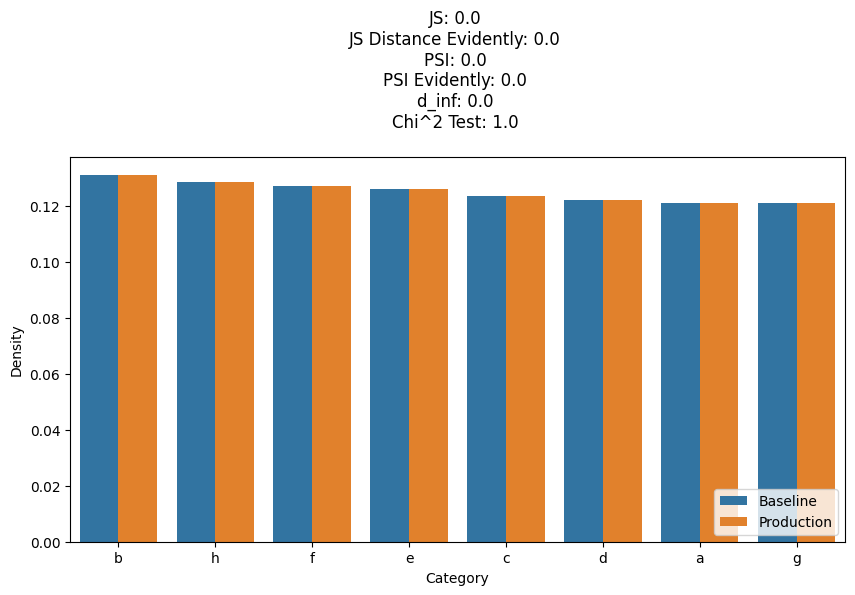

In [56]:
g = categorical_grouped_bar_plot(b_list, b_list)

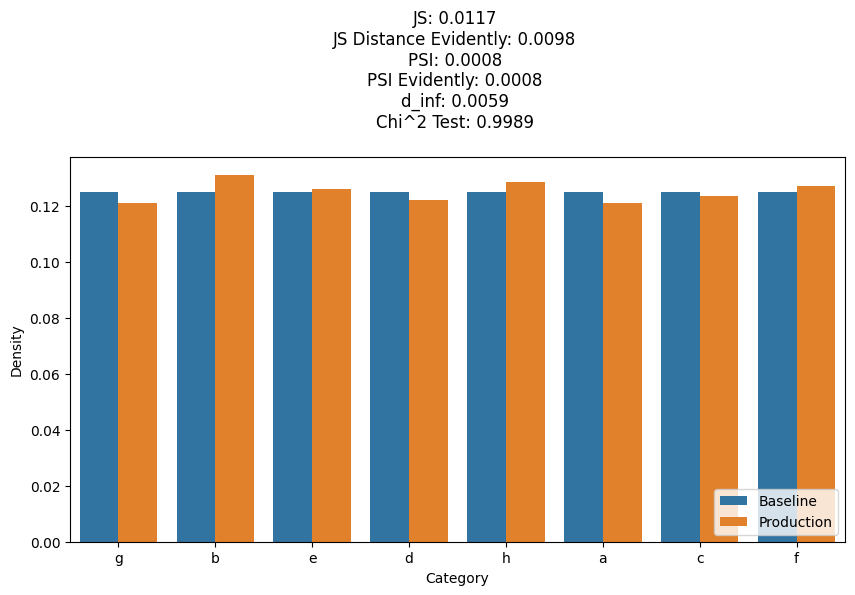

In [57]:
g = categorical_grouped_bar_plot(a_list, b_list)

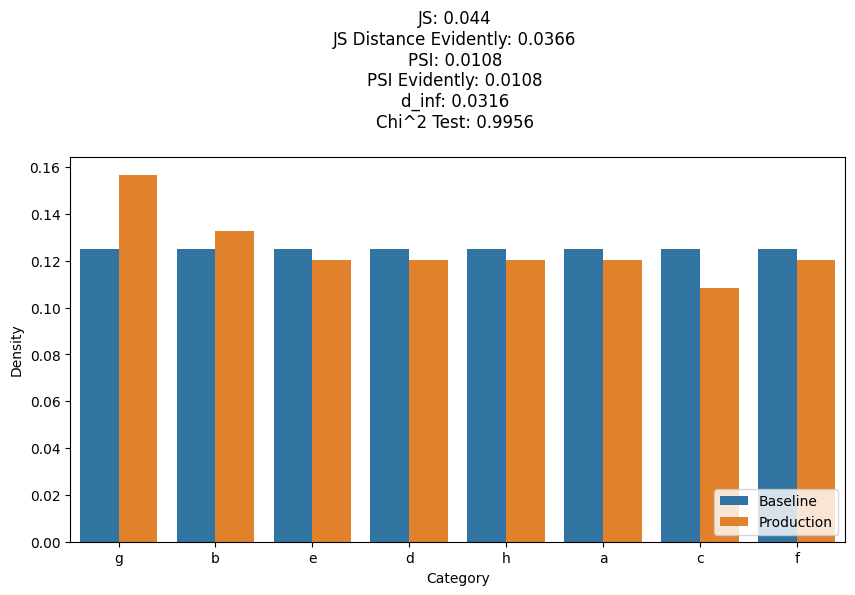

In [58]:
g = categorical_grouped_bar_plot(a_list, c_list)

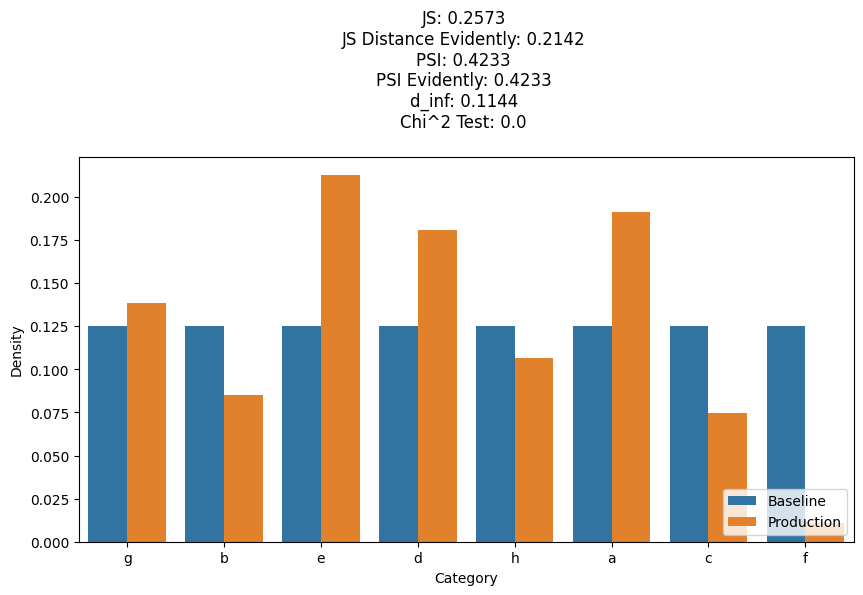

In [59]:
g = categorical_grouped_bar_plot(a_list, d_list)

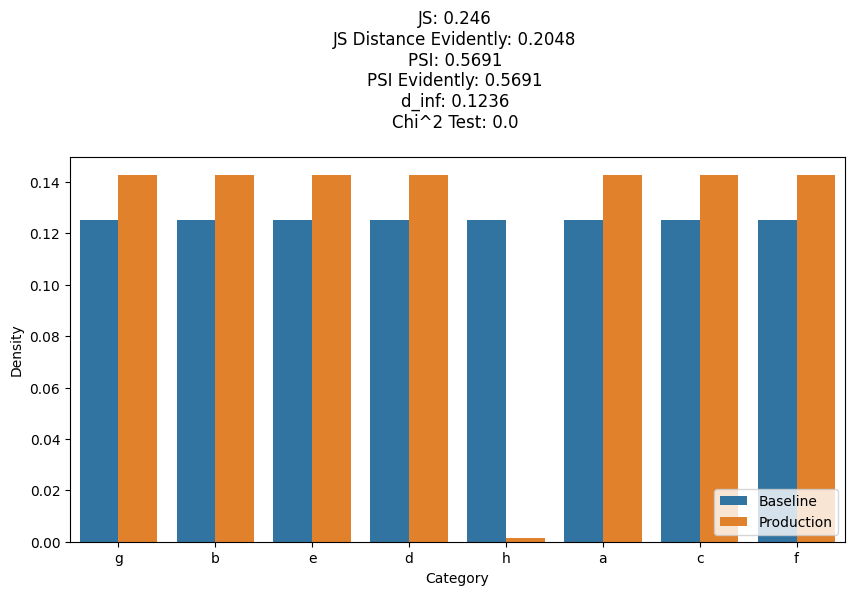

In [60]:
g = categorical_grouped_bar_plot(a_list, e_list)

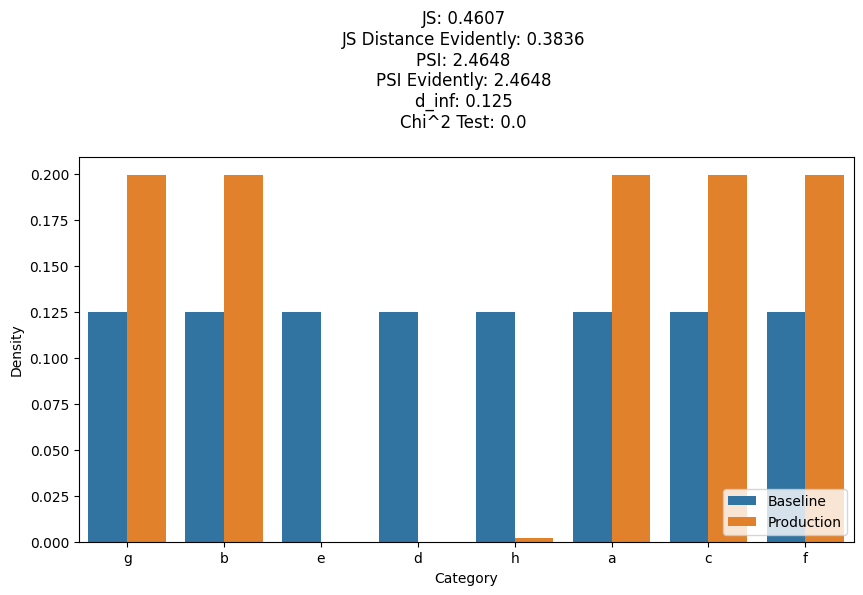

In [61]:
g = categorical_grouped_bar_plot(a_list, f_list)

/home/dpb/miniconda3/envs/data-drift-env/lib/python3.8/site-packages/scipy/stats/stats.py:5982: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


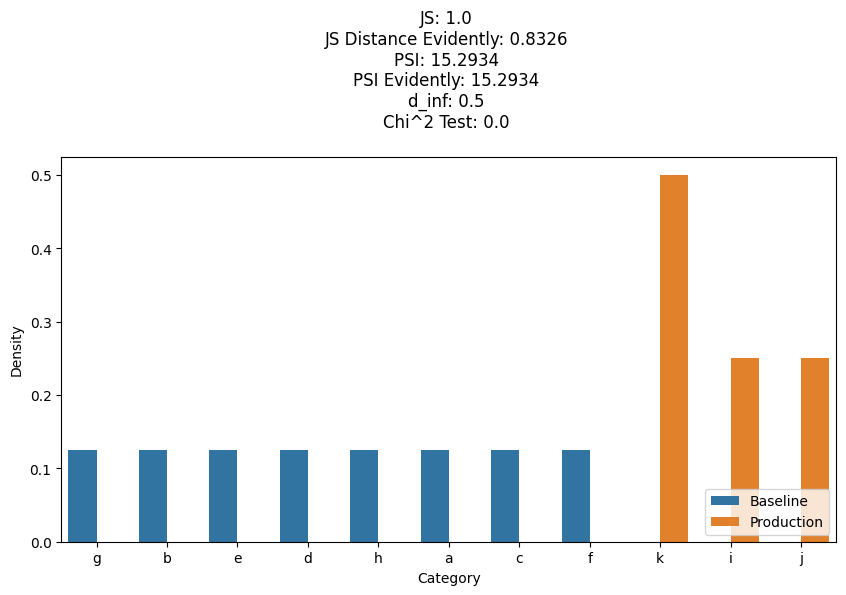

In [62]:
g = categorical_grouped_bar_plot(a_list, g_list)

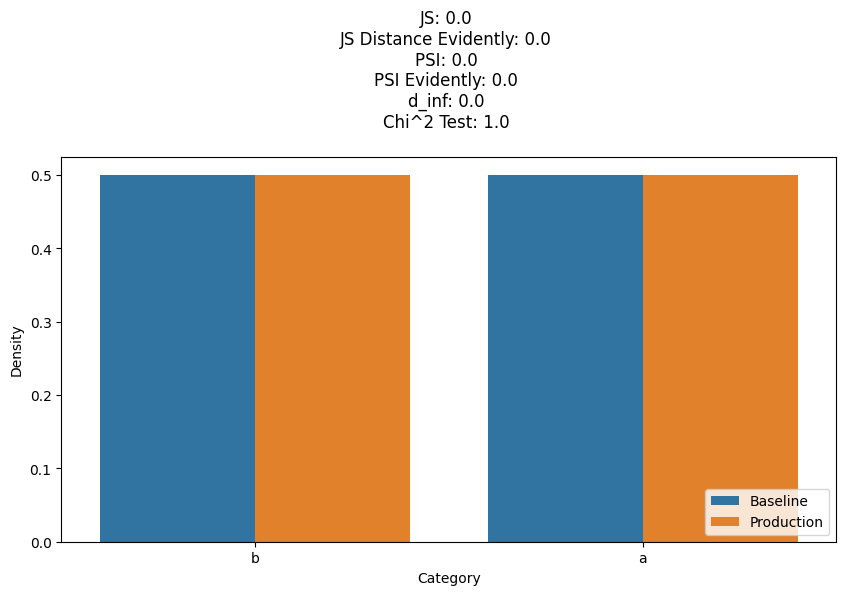

In [63]:
g = categorical_grouped_bar_plot(h_list, h_list)

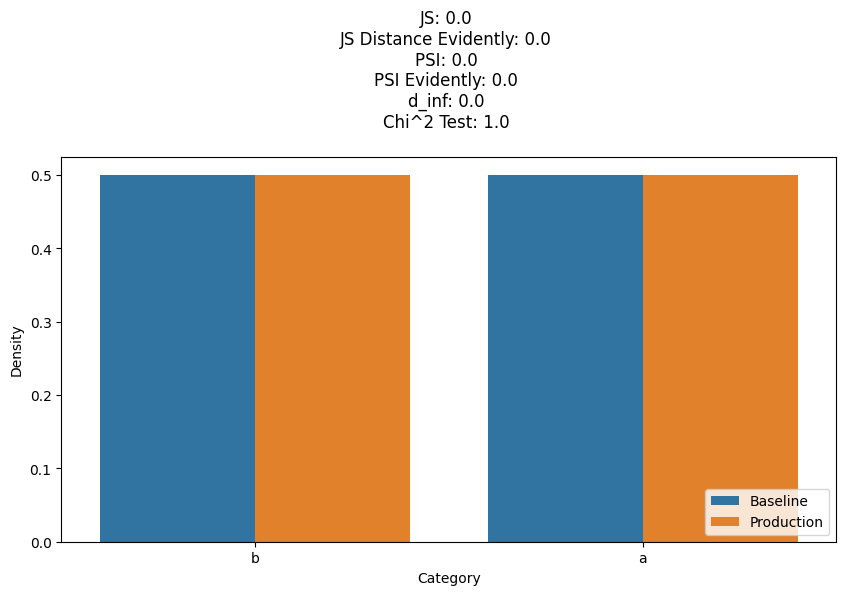

In [64]:
g = categorical_grouped_bar_plot(h_list, i_list)

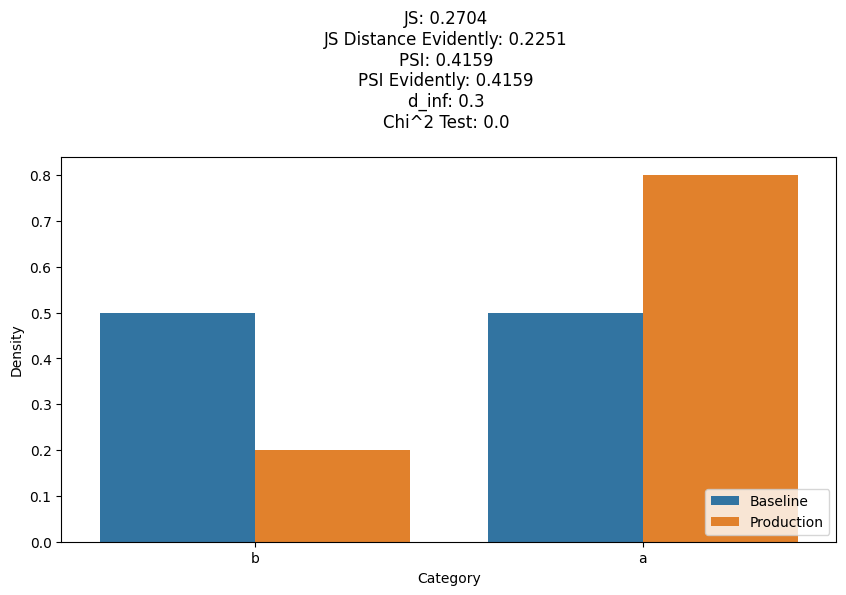

In [65]:
g = categorical_grouped_bar_plot(h_list, j_list)

/home/dpb/miniconda3/envs/data-drift-env/lib/python3.8/site-packages/scipy/stats/stats.py:5982: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


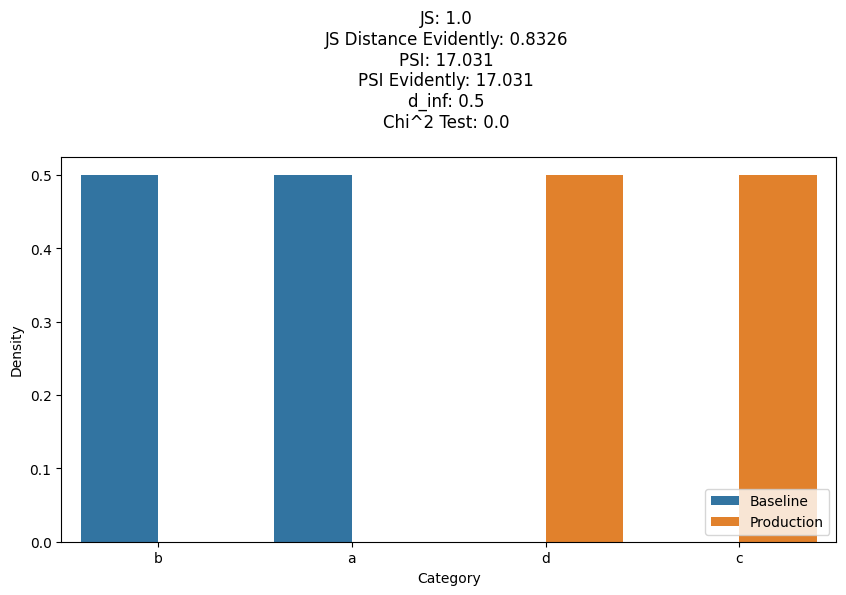

In [66]:
g = categorical_grouped_bar_plot(h_list, k_list)